In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
cities

['kenai',
 'punta arenas',
 'hermanus',
 'jamestown',
 'norman wells',
 'tiksi',
 'atuona',
 'tasiilaq',
 'yomitan',
 'bredasdorp',
 'castro',
 'misratah',
 'yellowknife',
 'cabo san lucas',
 'hithadhoo',
 'cape town',
 'rawson',
 'temaraia',
 'rikitea',
 'mys shmidta',
 'port alfred',
 'saint anthony',
 'kapaa',
 'nguiu',
 'araguacu',
 'kaitangata',
 'parksville',
 'kruisfontein',
 'esperance',
 'haines junction',
 'taolanaro',
 'thompson',
 'oni',
 'samusu',
 'kulpahar',
 'bathsheba',
 'yazoo city',
 'albany',
 'petropavlovsk-kamchatskiy',
 'mapimi',
 'havoysund',
 'martapura',
 'buin',
 'ushuaia',
 'korla',
 'port elizabeth',
 'hirara',
 'padang',
 'toora-khem',
 'rio gallegos',
 'kalamare',
 'cortez',
 'sentyabrskiy',
 'dingle',
 'mar del plata',
 'pangnirtung',
 'busselton',
 'nanortalik',
 'avarua',
 'hobart',
 'dikson',
 'arraial do cabo',
 'bambous virieux',
 'puerto ayora',
 'kilindoni',
 'ancud',
 'port hedland',
 'cidreira',
 'port blair',
 'las cruces',
 'karaul',
 'chatako

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54be4259be8a1d9a0234c02433047e02


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 13 | kenai
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | hermanus
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | norman wells
Processing Record 6 of Set 13 | tiksi
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | tasiilaq
Processing Record 9 of Set 13 | yomitan
City not found. Skipping...
Processing Record 10 of Set 13 | bredasdorp
Processing Record 11 of Set 13 | castro
Processing Record 12 of Set 13 | misratah
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | cabo san lucas
Processing Record 15 of Set 13 | hithadhoo
Processing Record 16 of Set 13 | cape town
Processing Record 17 of Set 13 | rawson
Processing Record 18 of Set 13 | temaraia
City not found. Skipping...
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 13 | port alfred
Processing Record 22 of Set 1

Processing Record 35 of Set 16 | khandyga
Processing Record 36 of Set 16 | beringovskiy
Processing Record 37 of Set 16 | maumere
Processing Record 38 of Set 16 | evensk
Processing Record 39 of Set 16 | kachug
Processing Record 40 of Set 16 | astana
Processing Record 41 of Set 16 | sistranda
Processing Record 42 of Set 16 | mahina
Processing Record 43 of Set 16 | dzhalka
Processing Record 44 of Set 16 | saskylakh
Processing Record 45 of Set 16 | gat
Processing Record 46 of Set 16 | klaksvik
Processing Record 47 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 16 | dalvik
Processing Record 50 of Set 16 | san andres
Processing Record 1 of Set 17 | kiama
Processing Record 2 of Set 17 | tura
Processing Record 3 of Set 17 | harper
Processing Record 4 of Set 17 | muros
Processing Record 5 of Set 17 | curuca
Processing Record 6 of Set 17 | concepcion del oro
Processing Record 7 of Set

Processing Record 16 of Set 20 | jarvakandi
Processing Record 17 of Set 20 | katherine
Processing Record 18 of Set 20 | mandalgovi
Processing Record 19 of Set 20 | okitipupa
Processing Record 20 of Set 20 | ryuo
Processing Record 21 of Set 20 | naze
Processing Record 22 of Set 20 | eydhafushi
Processing Record 23 of Set 20 | kaiyuan
Processing Record 24 of Set 20 | poyarkovo
Processing Record 25 of Set 20 | flinders
Processing Record 26 of Set 20 | pop
Processing Record 27 of Set 20 | chirongui
Processing Record 28 of Set 20 | vostok
Processing Record 29 of Set 20 | san nicolas
Processing Record 30 of Set 20 | amapa
Processing Record 31 of Set 20 | igarka
Processing Record 32 of Set 20 | klyuchi
Processing Record 33 of Set 20 | zhongshan
Processing Record 34 of Set 20 | gunjur
Processing Record 35 of Set 20 | lumeje
Processing Record 36 of Set 20 | sikasso
Processing Record 37 of Set 20 | faya
Processing Record 38 of Set 20 | getulio vargas
Processing Record 39 of Set 20 | indian harbo

Processing Record 2 of Set 24 | vrangel
Processing Record 3 of Set 24 | havelock
Processing Record 4 of Set 24 | gorin
Processing Record 5 of Set 24 | yarada
Processing Record 6 of Set 24 | burnie
Processing Record 7 of Set 24 | safranbolu
Processing Record 8 of Set 24 | resistencia
Processing Record 9 of Set 24 | sur
Processing Record 10 of Set 24 | adeje
Processing Record 11 of Set 24 | kirakira
Processing Record 12 of Set 24 | urumqi
Processing Record 13 of Set 24 | buguda
Processing Record 14 of Set 24 | araouane
Processing Record 15 of Set 24 | butembo
Processing Record 16 of Set 24 | pinyug
Processing Record 17 of Set 24 | westport
Processing Record 18 of Set 24 | luzilandia
Processing Record 19 of Set 24 | mitsuke
Processing Record 20 of Set 24 | teknaf
Processing Record 21 of Set 24 | moron
Processing Record 22 of Set 24 | katima mulilo
Processing Record 23 of Set 24 | wadern
Processing Record 24 of Set 24 | moa
Processing Record 25 of Set 24 | yanam
Processing Record 26 of Set

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.55,-151.26,39.00,100,90,3.36,US,2020-04-18 15:44:21
1,Punta Arenas,-53.15,-70.92,48.20,61,27,14.99,CL,2020-04-18 15:43:24
2,Hermanus,-34.42,19.23,82.00,49,0,4.00,ZA,2020-04-18 15:43:53
3,Jamestown,42.10,-79.24,35.01,74,90,8.05,US,2020-04-18 15:43:28
4,Norman Wells,65.28,-126.83,30.20,86,90,3.36,CA,2020-04-18 15:43:36
5,Tiksi,71.69,128.87,8.74,90,98,5.41,RU,2020-04-18 15:43:51
6,Atuona,-9.80,-139.03,81.99,76,38,13.51,PF,2020-04-18 15:43:42
7,Tasiilaq,65.61,-37.64,32.00,89,75,14.99,GL,2020-04-18 15:39:25
8,Bredasdorp,-34.53,20.04,77.00,44,0,8.05,ZA,2020-04-18 15:43:37
9,Castro,-24.79,-50.01,68.31,42,33,5.91,BR,2020-04-18 15:42:55


In [13]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        578 non-null    object 
 1   Lat         578 non-null    float64
 2   Lng         578 non-null    float64
 3   Max Temp    578 non-null    float64
 4   Humidity    578 non-null    int64  
 5   Cloudiness  578 non-null    int64  
 6   Wind Speed  578 non-null    float64
 7   Country     578 non-null    object 
 8   Date        578 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 40.8+ KB


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2020-04-18 15:44:21,60.55,-151.26,39.00,100,90,3.36
1,Punta Arenas,CL,2020-04-18 15:43:24,-53.15,-70.92,48.20,61,27,14.99
2,Hermanus,ZA,2020-04-18 15:43:53,-34.42,19.23,82.00,49,0,4.00
3,Jamestown,US,2020-04-18 15:43:28,42.10,-79.24,35.01,74,90,8.05
4,Norman Wells,CA,2020-04-18 15:43:36,65.28,-126.83,30.20,86,90,3.36


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1587244357.8347883

In [22]:
today = time.strftime("%x")
today

'04/18/20'

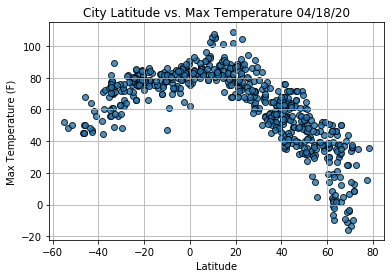

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

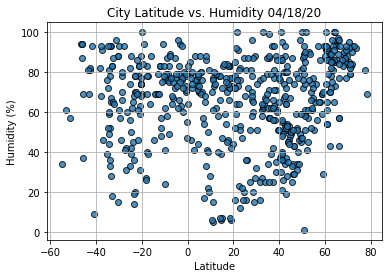

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

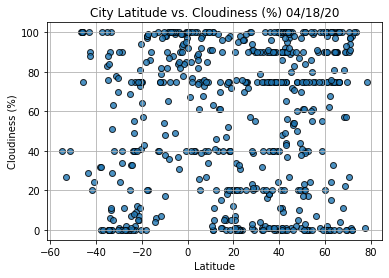

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

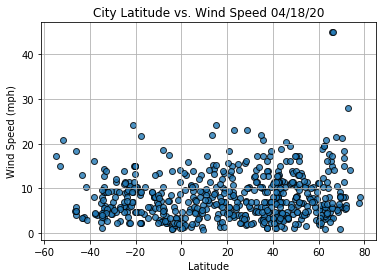

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()